In [1]:
import numpy as np
from matplotlib import pyplot as plt
import math
import scipy.stats as stats
import pandas as pd
from sklearn.model_selection import train_test_split

In [ ]:
# KCl regression fitting

In [22]:
data_KCl = pd.read_csv("NaCl.csv")
KCl_conc = data_KCl["NaCl conc"]
KCl_cond = data_KCl["NaCl cond"]

KCl_conc_train, KCl_conc_test, KCl_cond_train, KCl_cond_test = train_test_split(KCl_conc, KCl_cond, test_size=0.25, random_state=0)

KCl_conc = list(KCl_conc_train)
KCl_cond = list(KCl_cond_train)
ndata = len(KCl_conc)

KCl_conc = np.array([float(KCl_conc[i]) for i in range(ndata)])
KCl_cond = np.array([KCl_cond[i] for i in range(ndata)])

for i in range(ndata):
    if KCl_conc[i] == 0:
        KCl_conc[i] = 10**(-6)

weight = [1/(KCl_conc[i]) for i in range(ndata)]

# evaluating the weight matrix
W = np.zeros((ndata, ndata))
for i in range(ndata):
    W[i, i] = weight[i]

KCl_conc_oh = [KCl_conc[i]**1.5 for i in range(ndata)]
KCl_conc_hf = [KCl_conc[i]**0.5 for i in range(ndata)]
KCl_conc_sq = [KCl_conc[i]**2 for i in range(ndata)]

print(data_KCl)
# print(KCl_conc)

    NaCl conc  NaCl cond
0           0       4.25
1           1     112.31
2           2     220.46
3           3     321.83
4           4     421.40
5           5     525.06
6          10    1030.10
7          20    2008.10
8          30    2958.30
9          40    3882.10
10         50    4795.00
11         60    5733.20
12         70    6640.20
13         80    7488.20
14         90    8316.10
15        100    9244.00


In [23]:
# X = np.ones((ndata, 4))
# X[:, 1] = KCl_conc
# X[:, 2] = KCl_conc_oh
# X[:, 3] = KCl_conc_sq

X = np.ones((ndata, 5))
X[:, 1] = KCl_conc
X[:, 2] = KCl_conc_hf
X[:, 3] = KCl_conc_oh
X[:, 4] = KCl_conc_sq

print(X)

[[1.00000000e+00 8.00000000e+01 8.94427191e+00 7.15541753e+02
  6.40000000e+03]
 [1.00000000e+00 4.00000000e+00 2.00000000e+00 8.00000000e+00
  1.60000000e+01]
 [1.00000000e+00 2.00000000e+00 1.41421356e+00 2.82842712e+00
  4.00000000e+00]
 [1.00000000e+00 9.00000000e+01 9.48683298e+00 8.53814968e+02
  8.10000000e+03]
 [1.00000000e+00 5.00000000e+01 7.07106781e+00 3.53553391e+02
  2.50000000e+03]
 [1.00000000e+00 2.00000000e+01 4.47213595e+00 8.94427191e+01
  4.00000000e+02]
 [1.00000000e+00 1.00000000e+02 1.00000000e+01 1.00000000e+03
  1.00000000e+04]
 [1.00000000e+00 6.00000000e+01 7.74596669e+00 4.64758002e+02
  3.60000000e+03]
 [1.00000000e+00 3.00000000e+00 1.73205081e+00 5.19615242e+00
  9.00000000e+00]
 [1.00000000e+00 1.00000000e-06 1.00000000e-03 1.00000000e-09
  1.00000000e-12]
 [1.00000000e+00 5.00000000e+00 2.23606798e+00 1.11803399e+01
  2.50000000e+01]
 [1.00000000e+00 7.00000000e+01 8.36660027e+00 5.85662019e+02
  4.90000000e+03]]


In [24]:
A = np.matmul(np.transpose(X), X)
XXinv = np.linalg.inv(A)
print(XXinv)

[[ 9.78890617e-01  3.02614646e-01 -9.78888508e-01 -3.65483380e-02
   1.51304363e-03]
 [ 3.02614646e-01  3.99682387e-01 -7.94197487e-01 -6.27577572e-02
   3.05968905e-03]
 [-9.78888508e-01 -7.94197487e-01  1.83609590e+00  1.16095893e-01
  -5.42995948e-03]
 [-3.65483380e-02 -6.27577572e-02  1.16095893e-01  1.01939195e-02
  -5.07542971e-04]
 [ 1.51304363e-03  3.05968905e-03 -5.42995948e-03 -5.07542971e-04
   2.56281388e-05]]


In [25]:
B = np.matmul(np.transpose(X), KCl_cond)
beta_hat = np.matmul(XXinv, B)
print(f"Beta hat is:{beta_hat}")

Beta hat is:[ 5.25530386e+00  1.06231244e+02  2.86869573e+00 -1.57209611e+00
  1.35332824e-02]


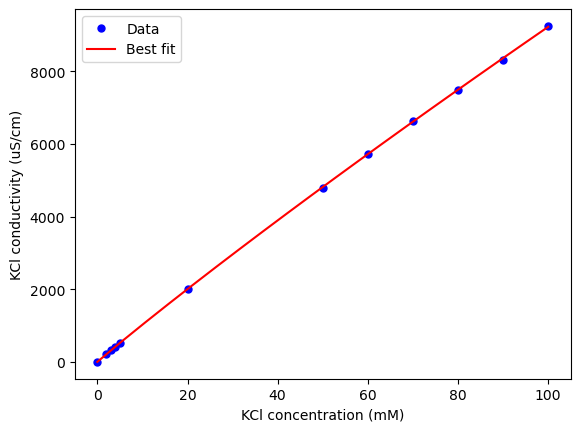

In [26]:
# evaluating predictions
KCl_conc_plot = np.linspace(0, 100, 20)
KCl_conc_plot_oh = [KCl_conc_plot[i]**1.5 for i in range(len(KCl_conc_plot))]
KCl_conc_plot_hf = [KCl_conc_plot[i]**0.5 for i in range(len(KCl_conc_plot))]
KCl_conc_plot_sq = [KCl_conc_plot[i]**2 for i in range(len(KCl_conc_plot))]

# X_plot = np.ones((len(KCl_conc_plot), 4))
# X_plot[:, 1] = KCl_conc_plot
# X_plot[:, 2] = KCl_conc_plot_oh
# X_plot[:, 3] = KCl_conc_plot_sq

X_plot = np.ones((len(KCl_conc_plot), 5))
X_plot[:, 1] = KCl_conc_plot
X_plot[:, 2] = KCl_conc_plot_hf
X_plot[:, 3] = KCl_conc_plot_oh
X_plot[:, 4] = KCl_conc_plot_sq

KCl_cond_plot = np.matmul(beta_hat, np.transpose(X_plot))

plt.plot(KCl_conc, KCl_cond, "b.", markersize=10, label="Data")
plt.plot(KCl_conc_plot, KCl_cond_plot, "r-", label="Best fit")
plt.xlabel("KCl concentration (mM)")
plt.ylabel("KCl conductivity (uS/cm)")
plt.legend()
plt.show()
                 

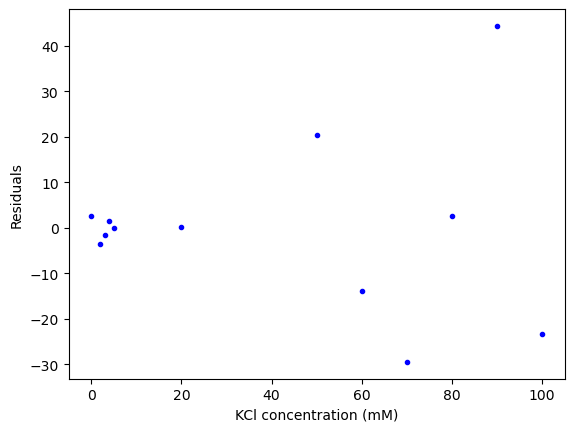

In [7]:
# calculating residuals
KCl_cond_pred = np.matmul(beta_hat, np.transpose(X))
e = KCl_cond_pred - KCl_cond

plt.plot(KCl_conc, e, "b.")
plt.xlabel("KCl concentration (mM)")
plt.ylabel("Residuals")
plt.show()

In [8]:
# variance of residuals
sse = sum(e**2)
var = sse/(ndata - 4)

# AIC evaluation
MLE_sigma_sq = sse/ndata
k = 5

AIC = 2*k + ndata*math.log(MLE_sigma_sq) + ndata*math.log(2*math.pi) + (1/MLE_sigma_sq)*sse
AICc = AIC + ((2*(k**2) + 2*k)/(ndata - k - 1))

if ndata/k < 40:
    print(f"AICc value is: {AICc}")
else:
    print(f"AIC value is: {AIC}")

# covariance matrix of fitted parameters
Sigma_beta = var*XXinv
print(Sigma_beta)

AICc value is: 123.81867628068998
[[ 2.29543963e+02 -6.06748604e+01  1.27308914e+01 -6.94072550e-01]
 [-6.06748604e+01  2.82050418e+01 -6.29893165e+00  3.57104870e-01]
 [ 1.27308914e+01 -6.29893165e+00  1.43308854e+00 -8.24772775e-02]
 [-6.94072550e-01  3.57104870e-01 -8.24772775e-02  4.80670703e-03]]


In [9]:
var_list = [Sigma_beta[i, i] for i in range(len(Sigma_beta))]
print(f"Variance is:{var_list}")
sd_list = [np.sqrt(var_list[i]) for i in range(len(var_list))]
print(f"Sd is: {sd_list}")

corr = np.zeros((len(var_list), len(var_list)))
for i in range(len(var_list)):
    for j in range(len(var_list)):
        corr[i, j] = Sigma_beta[i, j]/(sd_list[i]*sd_list[j])
print(corr)

Variance is:[229.54396287040504, 28.20504176673037, 1.4330885374645885, 0.004806707031546756]
Sd is: [15.150708328999178, 5.310841907525621, 1.1971167601635977, 0.06933041923677338]
[[ 1.         -0.75407141  0.70192282 -0.66076663]
 [-0.75407141  1.         -0.99075668  0.96985894]
 [ 0.70192282 -0.99075668  1.         -0.99374276]
 [-0.66076663  0.96985894 -0.99374276  1.        ]]


In [10]:
# r squared evaluation
KCl_cond_mean = np.mean(KCl_cond)
sd = KCl_cond - KCl_cond_mean
tss = sum(sd**2)
r_squared = 1 - (sse/tss)
print(r_squared)

0.9999715219259881


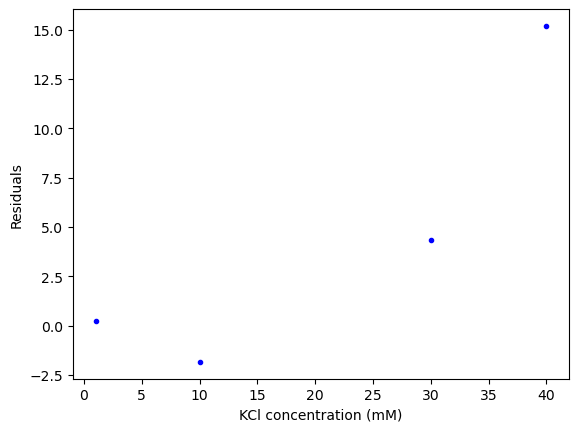

In [11]:
# evaluating test data
KCl_conc_test = list(KCl_conc_test)
KCl_cond_test = list(KCl_cond_test)
ndata_test = len(KCl_conc_test)

KCl_conc_test_hf = [KCl_conc_test[i]**0.5 for i in range(ndata_test)]
KCl_conc_test_oh = [KCl_conc_test[i]**1.5 for i in range(ndata_test)]
KCl_conc_test_sq = [KCl_conc_test[i]**2 for i in range(ndata_test)]

X_test = np.ones((ndata_test, 4))
X_test[:, 1] = KCl_conc_test
# X_test[:, 2] = KCl_conc_test_hf
X_test[:, 2] = KCl_conc_test_oh
X_test[:, 3] = KCl_conc_test_sq

KCl_cond_test_pred = np.matmul(beta_hat, np.transpose(X_test))
e = KCl_cond_test_pred - KCl_cond_test

# print(KCl_conc_test)

plt.plot(KCl_conc_test, e, "b.")
plt.xlabel("KCl concentration (mM)")
plt.ylabel("Residuals")
plt.show()

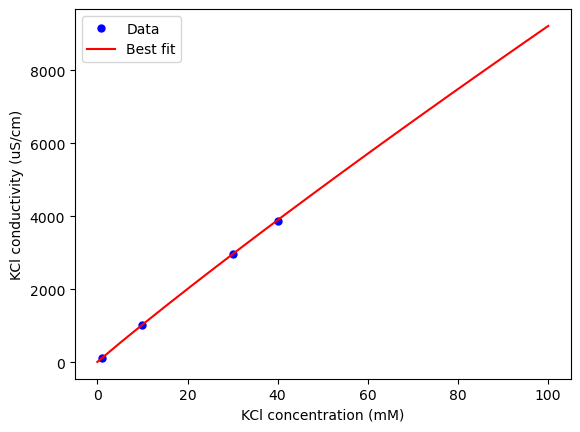

In [12]:
KCl_conc_plot = np.linspace(0, 100, 20)
KCl_conc_plot_oh = [KCl_conc_plot[i]**1.5 for i in range(len(KCl_conc_plot))]
KCl_conc_plot_hf = [KCl_conc_plot[i]**0.5 for i in range(len(KCl_conc_plot))]
KCl_conc_plot_sq = [KCl_conc_plot[i]**2 for i in range(len(KCl_conc_plot))]

X_plot = np.ones((len(KCl_conc_plot), 4))
X_plot[:, 1] = KCl_conc_plot
# X_plot[:, 2] = KCl_conc_plot_hf
X_plot[:, 2] = KCl_conc_plot_oh
X_plot[:, 3] = KCl_conc_plot_sq

KCl_cond_plot = np.matmul(beta_hat, np.transpose(X_plot))

plt.plot(KCl_conc_test, KCl_cond_test, "b.", markersize=10, label="Data")
plt.plot(KCl_conc_plot, KCl_cond_plot, "r-", label="Best fit")
plt.xlabel("KCl concentration (mM)")
plt.ylabel("KCl conductivity (uS/cm)")
plt.legend()
plt.show()

In [13]:
# r squared evaluation
sse = sum(e[i]**2 for i in range(ndata_test))
KCl_cond_test_mean = np.mean(KCl_cond_test)
sd = KCl_cond_test - KCl_cond_test_mean
tss = sum(sd**2)
r_squared = 1 - (sse/tss)
print(f"r-squared value is: {r_squared}")

r-squared value is: 0.9999717619222172


In [ ]:
# Weighted linear regression to solve heteroscedasticity

In [78]:
# transforming predictor variables by the weights
X_tr = np.matmul(np.transpose(X), W)

# transforming conductivity by the weights
KCl_cond_tr = np.matmul(W, KCl_cond)

F = np.matmul(X_tr, X)
XXinv_tr = np.linalg.inv(F)

R = np.matmul(np.transpose(X), KCl_cond_tr)

# parameter vector
beta_hat2 = np.matmul(XXinv_tr, R)
print(f"The parameters are: {beta_hat2}")

The parameters are: [  0.85039802 113.14184885  29.48877657   3.28440754  -0.28817521]


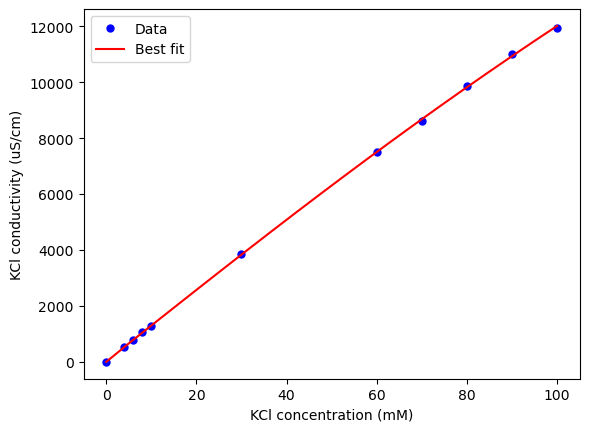

In [79]:
# evaluating predictions
KCl_conc_plot = np.linspace(0, 100, 20)
KCl_conc_plot_oh = [KCl_conc_plot[i]**1.5 for i in range(len(KCl_conc_plot))]
KCl_conc_plot_hf = [KCl_conc_plot[i]**0.5 for i in range(len(KCl_conc_plot))]
KCl_conc_plot_sq = [KCl_conc_plot[i]**2 for i in range(len(KCl_conc_plot))]

X_plot = np.ones((len(KCl_conc_plot), 5))
X_plot[:, 1] = KCl_conc_plot
X_plot[:, 2] = KCl_conc_plot_hf
X_plot[:, 3] = KCl_conc_plot_oh
X_plot[:, 4] = KCl_conc_plot_sq

KCl_cond_plot = np.matmul(beta_hat2, np.transpose(X_plot))

plt.plot(KCl_conc, KCl_cond, "b.", markersize=10, label="Data")
plt.plot(KCl_conc_plot, KCl_cond_plot, "r-", label="Best fit")
plt.xlabel("KCl concentration (mM)")
plt.ylabel("KCl conductivity (uS/cm)")
plt.legend()
plt.show()

Predicted weighted KCl_cond is: [1.20125785e+02 1.30658311e+02 1.33514951e+02 1.21482545e+02
 1.25113406e+02 1.27898270e+02 1.23985641e+02 1.31638396e+02
 8.79999941e+05 1.30056515e+02 1.22772042e+02]


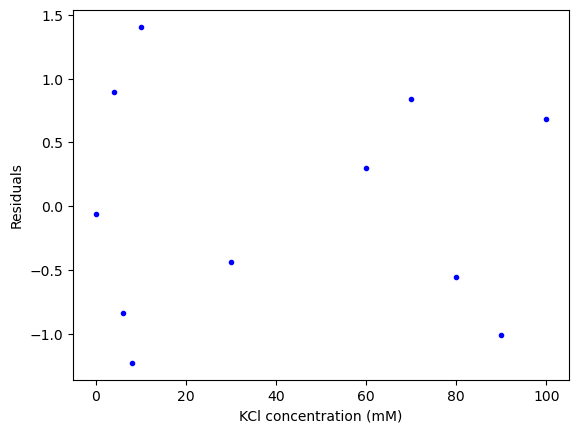

In [80]:
# evaluating predicted conductivity
KCl_cond_pred_tr = np.matmul(beta_hat2, X_tr)
print(f"Predicted weighted KCl_cond is: {KCl_cond_pred_tr}")

# calculating conductivity residuals
e = [KCl_cond_pred_tr[i] - KCl_cond_tr[i] for i in range(ndata)]

# plotting residuals
plt.plot(KCl_conc, e, "b.")
plt.xlabel("KCl concentration (mM)")
plt.ylabel("Residuals")
plt.show()

In [ ]:
# NdCl3 fitting

In [137]:
data_NdCl3 = pd.read_csv("NdCl3.csv")
NdCl3_conc = data_NdCl3["NdCl3 conc"]
NdCl3_cond = data_NdCl3["NdCl3 cond"]

NdCl3_conc_train, NdCl3_conc_test, NdCl3_cond_train, NdCl3_cond_test = train_test_split(NdCl3_conc, NdCl3_cond, test_size=0.25, random_state=0)

NdCl3_conc = list(NdCl3_conc_train)
NdCl3_cond = list(NdCl3_cond_train)
ndata = len(NdCl3_conc)

NdCl3_conc_hf = [NdCl3_conc[i]**0.5 for i in range(ndata)]
NdCl3_conc_oh = [NdCl3_conc[i]**1.5 for i in range(ndata)]
NdCl3_conc_sq = [NdCl3_conc[i]**2 for i in range(ndata)]

# print(data_NdCl3)

In [138]:
X = np.ones((ndata, 4))
X[:, 1] = NdCl3_conc
# X[:, 2] = NdCl3_conc_hf
X[:, 2] = NdCl3_conc_oh
X[:, 3] = NdCl3_conc_sq
print(X)

[[1.00000000e+00 1.00000000e+02 1.00000000e+03 1.00000000e+04]
 [1.00000000e+00 8.00000000e+00 2.26274170e+01 6.40000000e+01]
 [1.00000000e+00 4.00000000e+00 8.00000000e+00 1.60000000e+01]
 [1.00000000e+00 9.00000000e+01 8.53814968e+02 8.10000000e+03]
 [1.00000000e+00 6.00000000e+01 4.64758002e+02 3.60000000e+03]
 [1.00000000e+00 3.00000000e+01 1.64316767e+02 9.00000000e+02]
 [1.00000000e+00 7.00000000e+01 5.85662019e+02 4.90000000e+03]
 [1.00000000e+00 6.00000000e+00 1.46969385e+01 3.60000000e+01]
 [1.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.00000000e+00 1.00000000e+01 3.16227766e+01 1.00000000e+02]
 [1.00000000e+00 8.00000000e+01 7.15541753e+02 6.40000000e+03]]


In [139]:
A = np.matmul(np.transpose(X), X)
XXinv = np.linalg.inv(A)
print(XXinv)

[[ 6.78254132e-01 -1.51804933e-01  3.10308112e-02 -1.66330635e-03]
 [-1.51804933e-01  5.17110923e-02 -1.13214916e-02  6.36033333e-04]
 [ 3.10308112e-02 -1.13214916e-02  2.54596414e-03 -1.46153324e-04]
 [-1.66330635e-03  6.36033333e-04 -1.46153324e-04  8.53842846e-06]]


In [140]:
B = np.matmul(np.transpose(X), NdCl3_cond)
beta_hat = np.matmul(XXinv, B)
print(f"Beta hat is:{beta_hat}")

Beta hat is:[  7.46030326 341.33529329 -16.27905287   0.6228326 ]


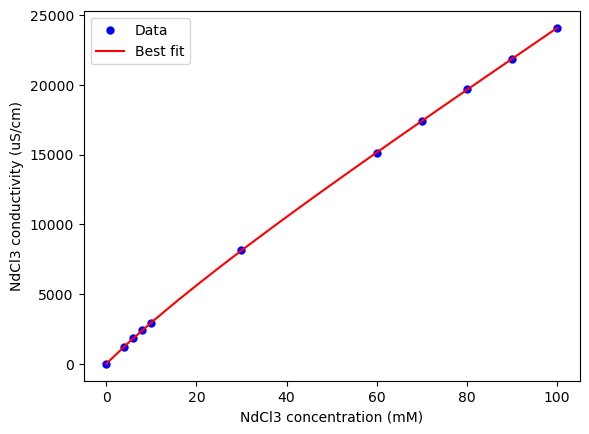

In [141]:
# evaluating predictions
NdCl3_conc_plot = np.linspace(0, 100, 20)
NdCl3_conc_plot_hf = [NdCl3_conc_plot[i]**0.5 for i in range(len(NdCl3_conc_plot))]
NdCl3_conc_plot_oh = [NdCl3_conc_plot[i]**1.5 for i in range(len(NdCl3_conc_plot))]
NdCl3_conc_plot_sq = [NdCl3_conc_plot[i]**2 for i in range(len(NdCl3_conc_plot))]
X_plot = np.ones((len(NdCl3_conc_plot), 4))
X_plot[:, 1] = NdCl3_conc_plot
# X_plot[:, 2] = NdCl3_conc_plot_hf
X_plot[:, 2] = NdCl3_conc_plot_oh
X_plot[:, 3] = NdCl3_conc_plot_sq

NdCl3_cond_plot = np.matmul(beta_hat, np.transpose(X_plot))

plt.plot(NdCl3_conc, NdCl3_cond, "b.", markersize=10, label="Data")
plt.plot(NdCl3_conc_plot, NdCl3_cond_plot, "r-", label="Best fit")
plt.xlabel("NdCl3 concentration (mM)")
plt.ylabel("NdCl3 conductivity (uS/cm)")
plt.legend()
plt.show()

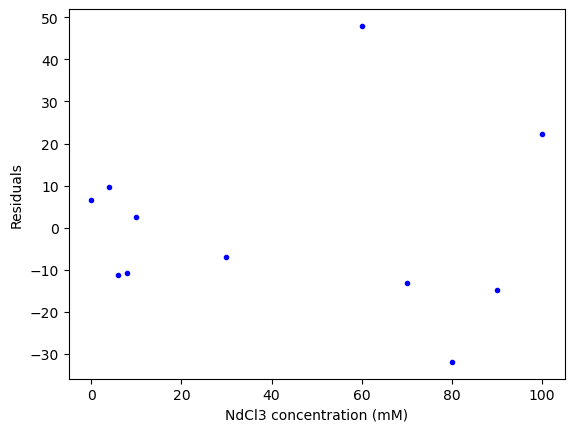

In [142]:
# calculating residuals
NdCl3_cond_pred = np.matmul(beta_hat, np.transpose(X))
e = NdCl3_cond_pred - NdCl3_cond

plt.plot(NdCl3_conc, e, "b.")
plt.xlabel("NdCl3 concentration (mM)")
plt.ylabel("Residuals")
plt.show()

In [126]:
# variance of residuals
sse = sum(e**2)
se = sse/(ndata - 4)

# AIC evaluation
MLE_sigma_sq = sse/ndata
k = 5

AIC = 2*k + ndata*math.log(MLE_sigma_sq) + ndata*math.log(2*math.pi) + (1/MLE_sigma_sq)*sse
AICc = AIC + ((2*(k**2) + 2*k)/(ndata - k - 1))

if ndata/k < 40:
    print(f"AICc value is: {AICc}")
else:
    print(f"AIC value is: {AIC}")

# covariance matrix of fitted parameters
Sigma_beta = se*XXinv
print(Sigma_beta)

AICc value is: 119.70276626896569
[[ 4.49413987e+02 -1.00586575e+02  2.05611436e+01 -1.10211365e+00]
 [-1.00586575e+02  3.42639831e+01 -7.50166706e+00  4.21438312e-01]
 [ 2.05611436e+01 -7.50166706e+00  1.68696635e+00 -9.68417954e-02]
 [-1.10211365e+00  4.21438312e-01 -9.68417954e-02  5.65759793e-03]]


In [127]:
var_list = [Sigma_beta[i, i] for i in range(len(Sigma_beta))]
print(f"Variance is:{var_list}")
sd_list = [np.sqrt(var_list[i]) for i in range(len(var_list))]
print(f"Sd is: {sd_list}")

corr = np.zeros((len(var_list), len(var_list)))
for i in range(len(var_list)):
    for j in range(len(var_list)):
        corr[i, j] = Sigma_beta[i, j]/(sd_list[i]*sd_list[j])
print(corr)

Variance is:[449.413987205705, 34.2639831365008, 1.686966346963496, 0.005657597934194226]
Sd is: [21.199386481823122, 5.853544493424543, 1.298832686285457, 0.07521700561837213]
[[ 1.         -0.81058358  0.74674232 -0.69117345]
 [-0.81058358  1.         -0.98670119  0.95719198]
 [ 0.74674232 -0.98670119  1.         -0.9912737 ]
 [-0.69117345  0.95719198 -0.9912737   1.        ]]


In [128]:
# r squared evaluation
NdCl3_cond_mean = np.mean(NdCl3_cond)
sd = NdCl3_cond - NdCl3_cond_mean
tss = sum(sd**2)
r_squared = 1 - (sse/tss)
print(f"r-squared value is: {r_squared}")

r-squared value is: 0.9999946428443349


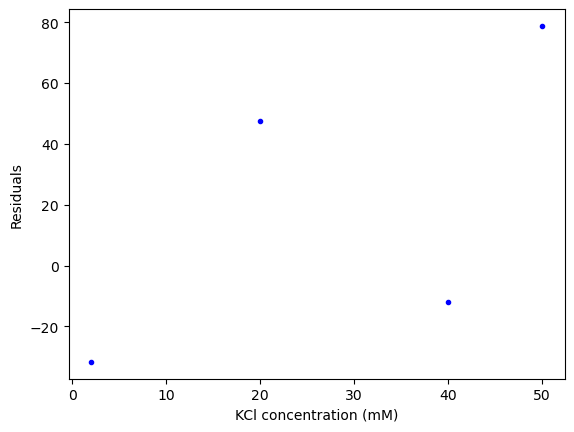

In [129]:
# evaluating test data
NdCl3_conc_test = list(NdCl3_conc_test)
NdCl3_cond_test = list(NdCl3_cond_test)
ndata_test = len(NdCl3_conc_test)

NdCl3_conc_test_sq = [NdCl3_conc_test[i]**2 for i in range(ndata_test)]
NdCl3_conc_test_oh = [NdCl3_conc_test[i]**1.5 for i in range(ndata_test)]
NdCl3_conc_test_hf = [NdCl3_conc_test[i]**0.5 for i in range(ndata_test)]

X_test = np.ones((ndata_test, 4))
X_test[:, 1] = NdCl3_conc_test
# X_test[:, 2] = NdCl3_conc_test_hf
X_test[:, 2] = NdCl3_conc_test_oh
X_test[:, 3] = NdCl3_conc_test_sq

NdCl3_cond_test_pred = np.matmul(beta_hat, np.transpose(X_test))

e = NdCl3_cond_test_pred - NdCl3_cond_test

plt.plot(NdCl3_conc_test, e, "b.")
plt.xlabel("KCl concentration (mM)")
plt.ylabel("Residuals")
plt.show()

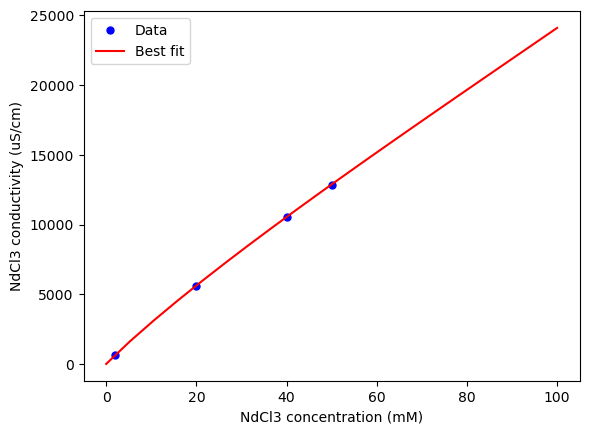

In [130]:
# evaluating predictions
NdCl3_conc_plot = np.linspace(0, 100, 20)
NdCl3_conc_plot_hf = [NdCl3_conc_plot[i]**0.5 for i in range(len(NdCl3_conc_plot))]
NdCl3_conc_plot_oh = [NdCl3_conc_plot[i]**1.5 for i in range(len(NdCl3_conc_plot))]
NdCl3_conc_plot_sq = [NdCl3_conc_plot[i]**2 for i in range(len(NdCl3_conc_plot))]

X_plot = np.ones((len(NdCl3_conc_plot), 4))
X_plot[:, 1] = NdCl3_conc_plot
# X_plot[:, 2] = NdCl3_conc_plot_hf
X_plot[:, 2] = NdCl3_conc_plot_oh
X_plot[:, 3] = NdCl3_conc_plot_sq

NdCl3_cond_plot = np.matmul(beta_hat, np.transpose(X_plot))

plt.plot(NdCl3_conc_test, NdCl3_cond_test, "b.", markersize=10, label="Data")
plt.plot(NdCl3_conc_plot, NdCl3_cond_plot, "r-", label="Best fit")
plt.xlabel("NdCl3 concentration (mM)")
plt.ylabel("NdCl3 conductivity (uS/cm)")
plt.legend()
plt.show()

In [131]:
# r squared evaluation
sse = sum(e[i]**2 for i in range(ndata_test))
NdCl3_cond_test_mean = np.mean(NdCl3_cond_test)
sd = NdCl3_cond_test - NdCl3_cond_test_mean
tss = sum(sd**2)
r_squared = 1 - (sse/tss)
print(f"r-squared value is: {r_squared}")

r-squared value is: 0.9998900597142122


In [ ]:
# combined salts

In [500]:
data = pd.read_csv("KCl&NdCl3.csv")
KCl_conc = data["KCl conc"]
NdCl3_conc = data["NdCl3 conc"]
cond = data["Bulk cond"]
ndata = len(KCl_conc)

conc = np.zeros((ndata, 2))
conc[:, 0] = KCl_conc
conc[:, 1] = NdCl3_conc

conc_train, conc_test, cond_train, cond_test = train_test_split(conc, cond, test_size=0.2, random_state=0)

ndata_train = len(conc_train)
cond_train = list(cond_train)

KCl_conc_train = conc_train[:, 0]
NdCl3_conc_train = conc_train[:, 1]

KCl_conc_oh = [KCl_conc_train[i]**1.5 for i in range(ndata_train)]
NdCl3_conc_oh = [NdCl3_conc_train[i]**1.5 for i in range(ndata_train)]

KCl_conc_hf = [KCl_conc_train[i]**0.5 for i in range(ndata_train)]
NdCl3_conc_hf = [NdCl3_conc_train[i]**0.5 for i in range(ndata_train)]

KCl_conc_sq = [KCl_conc_train[i]**2 for i in range(ndata_train)]
NdCl3_conc_sq = [NdCl3_conc_train[i]**2 for i in range(ndata_train)]

sum_conc = KCl_conc_train + NdCl3_conc_train
sum_sq = [sum_conc[i]**2 for i in range(ndata_train)]

In [501]:
X = np.ones((ndata_train, 6))
X[:, 1] = KCl_conc_train
X[:, 2] = NdCl3_conc_train
X[:, 3] = KCl_conc_oh
X[:, 4] = NdCl3_conc_oh
X[:, 5] = sum_sq
# X[:, 1] = KCl_conc_train
# X[:, 2] = NdCl3_conc_train
# X[:, 3] = KCl_conc_hf
# X[:, 4] = NdCl3_conc_hf
# X[:, 5] = KCl_conc_oh
# X[:, 6] = NdCl3_conc_oh
# X[:, 7] = KCl_conc_sq
# X[:, 8] = NdCl3_conc_sq
print(X)

[[1.00000000e+00 0.00000000e+00 2.00000000e+00 0.00000000e+00
  2.82842712e+00 4.00000000e+00]
 [1.00000000e+00 1.00000000e+02 0.00000000e+00 1.00000000e+03
  0.00000000e+00 1.00000000e+04]
 [1.00000000e+00 1.00000000e+01 0.00000000e+00 3.16227766e+01
  0.00000000e+00 1.00000000e+02]
 [1.00000000e+00 0.00000000e+00 7.00000000e+01 0.00000000e+00
  5.85662019e+02 4.90000000e+03]
 [1.00000000e+00 2.00000000e+00 4.00000000e+00 2.82842712e+00
  8.00000000e+00 3.60000000e+01]
 [1.00000000e+00 0.00000000e+00 9.00000000e+01 0.00000000e+00
  8.53814968e+02 8.10000000e+03]
 [1.00000000e+00 6.00000000e+00 0.00000000e+00 1.46969385e+01
  0.00000000e+00 3.60000000e+01]
 [1.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [1.00000000e+00 3.00000000e+01 0.00000000e+00 1.64316767e+02
  0.00000000e+00 9.00000000e+02]
 [1.00000000e+00 2.00000000e+00 0.00000000e+00 2.82842712e+00
  0.00000000e+00 4.00000000e+00]
 [1.00000000e+00 0.00000000e+00 6.00000000e+01 0.0

In [502]:
A = np.matmul(np.transpose(X), X)
XXinv = np.linalg.inv(A)
print(XXinv)

[[ 9.32769407e-02 -4.99137523e-03 -4.47288017e-03  3.11509321e-04
   2.64889898e-04  1.15172898e-05]
 [-4.99137523e-03  1.27878980e-03 -1.57431554e-04 -1.21437799e-04
   3.75641043e-05 -1.75228110e-06]
 [-4.47288017e-03 -1.57431554e-04  1.24670921e-03  1.33867030e-05
  -1.43546686e-04  1.02313290e-06]
 [ 3.11509321e-04 -1.21437799e-04  1.33867030e-05  1.38992871e-05
  -1.57467036e-06  3.09115783e-08]
 [ 2.64889898e-04  3.75641043e-05 -1.43546686e-04 -1.57467036e-06
   1.90709481e-05 -2.88314098e-07]
 [ 1.15172898e-05 -1.75228110e-06  1.02313290e-06  3.09115783e-08
  -2.88314098e-07  1.36306920e-08]]


In [503]:
B = np.matmul(np.transpose(X), cond_train)
beta_hat = np.matmul(XXinv, B)
print(f'Beta hat is:{beta_hat}')

Beta hat is:[ 1.26866064e+02  1.24399999e+02  2.88225373e+02  2.26819422e-01
 -4.16256275e+00 -8.07729725e-02]


In [490]:
# evaluating predictions
# KCl_conc_plot = np.linspace(0, 100, 20)
# NdCl3_conc_plot = np.linspace(0, 50, 20)
# KCl_conc_plot_oh = [KCl_conc_plot[i]**1.5 for i in range(len(KCl_conc_plot))]
# NdCl3_conc_plot_oh = [NdCl3_conc_plot[i]**1.5 for i in range(len(NdCl3_conc_plot))]
# sum_plot = KCl_conc_plot + NdCl3_conc_plot
# sum_plot_sq = [sum_plot[i]**2 for i in range(len(KCl_conc_plot))]

# X_plot = np.ones((len(KCl_conc_plot), 6))
# X_plot[:, 1] = KCl_conc_plot
# X_plot[:, 2] = NdCl3_conc_plot
# X_plot[:, 3] = KCl_conc_plot_oh
# X_plot[:, 4] = NdCl3_conc_plot_oh
# X_plot[:, 5] = sum_plot_sq

# cond_plot = np.matmul(beta_hat, np.transpose(X_plot))

# fig = plt.figure()
# ax = fig.add_subplot(projection='3d')

# # plotting
# ax.plot3D(KCl_conc_plot, NdCl3_conc_plot, cond_plot, label="Best fit")
# ax.scatter(KCl_conc, NdCl3_conc, cond, label="Data")
# ax.set_title('3D conductivity plot')
# ax.set_zlabel("Bulk conductivity (uS/cm)")
# ax.set_xlabel("KCl concentration (mM)")
# ax.set_ylabel("NdCl3 concentration (mM)")
# ax.legend()
# plt.show()

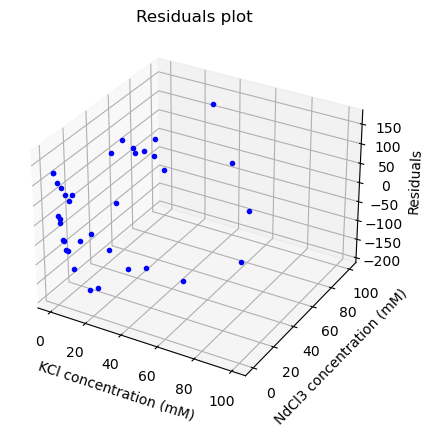

In [504]:
# calculating residuals
cond_train_pred = np.matmul(beta_hat, np.transpose(X))
e = cond_train_pred - cond_train

fig = plt.figure()
 
# syntax for 3-D projection
ax = fig.add_subplot(projection ='3d')

# plotting
ax.plot3D(KCl_conc_train, NdCl3_conc_train, e, "b.")
ax.set_title("Residuals plot")
ax.set_zlabel("Residuals")
ax.set_xlabel("KCl concentration (mM)")
ax.set_ylabel("NdCl3 concentration (mM)")
plt.show()

In [505]:
# variance of residuals
sse = sum(e[i]**2 for i in range(ndata_train))
se = sse/(ndata_train - 6)

# covariance matrix of fitted parameters
Sigma_beta = se*XXinv
print(Sigma_beta)

[[ 9.75782835e+02 -5.22154590e+01 -4.67914113e+01  3.25874162e+00
   2.77104946e+00  1.20483944e-01]
 [-5.22154590e+01  1.33775950e+01 -1.64691302e+00 -1.27037743e+00
   3.92963233e-01 -1.83308522e-02]
 [-4.67914113e+01 -1.64691302e+00  1.30419956e+01  1.40040131e-01
  -1.50166152e+00  1.07031332e-02]
 [ 3.25874162e+00 -1.27037743e+00  1.40040131e-01  1.45402344e-01
  -1.64728420e-02  3.23370248e-04]
 [ 2.77104946e+00  3.92963233e-01 -1.50166152e+00 -1.64728420e-02
   1.99503797e-01 -3.01609322e-03]
 [ 1.20483944e-01 -1.83308522e-02  1.07031332e-02  3.23370248e-04
  -3.01609322e-03  1.42592533e-04]]


In [506]:
var_list = [Sigma_beta[i, i] for i in range(len(Sigma_beta))]

sd_list = [np.sqrt(var_list[i]) for i in range(len(var_list))]
print(sd_list)

corr = np.zeros((len(var_list), len(var_list)))
for i in range(len(var_list)):
    for j in range(len(var_list)):
        corr[i, j] = Sigma_beta[i, j]/(sd_list[i]*sd_list[j])
print(corr)

[31.237522875044785, 3.6575394759730164, 3.6113703255764755, 0.38131659235507065, 0.44665847880133014, 0.011941211545674403]
[[ 1.         -0.4570182  -0.41477974  0.27358207  0.19860588  0.32300124]
 [-0.4570182   1.         -0.12468368 -0.91087345  0.24054    -0.41970606]
 [-0.41477974 -0.12468368  1.          0.10169387 -0.9309459   0.24819356]
 [ 0.27358207 -0.91087345  0.10169387  1.         -0.09671799  0.0710176 ]
 [ 0.19860588  0.24054    -0.9309459  -0.09671799  1.         -0.5654846 ]
 [ 0.32300124 -0.41970606  0.24819356  0.0710176  -0.5654846   1.        ]]


In [507]:
# r squared evaluation
cond_train_mean = np.mean(cond_train)
sd = [cond_train[i] - cond_train_mean for i in range(ndata_train)]
tss = sum(sd[i]**2 for i in range(ndata_train))

r_squared = 1 - (sse/tss)
print(f"r-squared value is: {r_squared}")

r-squared value is: 0.9998826412671827


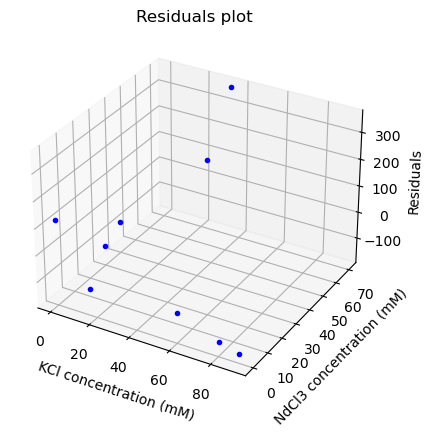

In [508]:
# evaluating test data
KCl_conc_test = conc_test[:, 0]
NdCl3_conc_test = conc_test[:, 1]
ndata_test = len(KCl_conc_test)

KCl_conc_oh = [KCl_conc_test[i]**1.5 for i in range(ndata_test)]
NdCl3_conc_oh = [NdCl3_conc_test[i]**1.5 for i in range(ndata_test)]

KCl_conc_hf = [KCl_conc_test[i]**0.5 for i in range(ndata_test)]
NdCl3_conc_hf = [NdCl3_conc_test[i]**0.5 for i in range(ndata_test)]

KCl_conc_sq = [KCl_conc_test[i]**2 for i in range(ndata_test)]
NdCl3_conc_sq = [NdCl3_conc_test[i]**2 for i in range(ndata_test)]

sum_conc = KCl_conc_test + NdCl3_conc_test
sum_sq = [sum_conc[i]**2 for i in range(ndata_test)]

X = np.ones((ndata_test, 6))
X[:, 1] = KCl_conc_test
X[:, 2] = NdCl3_conc_test
X[:, 3] = KCl_conc_oh
X[:, 4] = NdCl3_conc_oh
X[:, 5] = sum_sq
# X[:, 1] = KCl_conc_test
# X[:, 2] = NdCl3_conc_test
# X[:, 3] = KCl_conc_hf
# X[:, 4] = NdCl3_conc_hf
# X[:, 5] = KCl_conc_oh
# X[:, 6] = NdCl3_conc_oh
# X[:, 7] = KCl_conc_sq
# X[:, 8] = NdCl3_conc_sq

# evaluating model-predicted cond_test
cond_test_pred = np.matmul(beta_hat, np.transpose(X))
cond_test = list(cond_test)

e = cond_test_pred - cond_test

# plotting residuals
fig = plt.figure()
 
# syntax for 3-D projection
ax = fig.add_subplot(projection ='3d')

# plotting
ax.plot3D(KCl_conc_test, NdCl3_conc_test, e, "b.")
ax.set_title("Residuals plot")
ax.set_zlabel("Residuals")
ax.set_xlabel("KCl concentration (mM)")
ax.set_ylabel("NdCl3 concentration (mM)")
plt.show()

In [496]:
# evaluating predictions
# KCl_conc_plot = np.linspace(0, 100, 50)
# NdCl3_conc_plot = np.linspace(0, 50, 50)
# KCl_conc_plot_oh = [KCl_conc_plot[i]**1.5 for i in range(len(KCl_conc_plot))]
# NdCl3_conc_plot_oh = [NdCl3_conc_plot[i]**1.5 for i in range(len(NdCl3_conc_plot))]
# sum_plot = KCl_conc_plot + NdCl3_conc_plot
# sum_plot_sq = [sum_plot[i]**2 for i in range(len(KCl_conc_plot))]

# X_plot = np.ones((len(KCl_conc_plot), 6))
# X_plot[:, 1] = KCl_conc_plot
# X_plot[:, 2] = NdCl3_conc_plot
# X_plot[:, 3] = KCl_conc_plot_oh
# X_plot[:, 4] = NdCl3_conc_plot_oh
# X_plot[:, 5] = sum_plot_sq

# cond_plot = np.matmul(beta_hat, np.transpose(X_plot))

# fig = plt.figure()
# ax = fig.add_subplot(projection='3d')

# # plotting
# ax.plot3D(KCl_conc_plot, NdCl3_conc_plot, cond_plot, label="Best fit")
# ax.scatter(KCl_conc_test, NdCl3_conc_test, cond_test, label="Data")
# ax.set_title('3D conductivity plot')
# ax.set_zlabel("Bulk conductivity (uS/cm)")
# ax.set_xlabel("KCl concentration (mM)")
# ax.set_ylabel("NdCl3 concentration (mM)")
# ax.legend()
# plt.show()

In [509]:
# r squared evaluation
sse = sum(e[i]**2 for i in range(ndata_test))
cond_test_mean = np.mean(cond_test)
sd = [cond_test[i] - cond_test_mean for i in range(ndata_test)]
tss = sum(sd[i]**2 for i in range(ndata_test))

r_squared = 1 - (sse/tss)
print(f"r-squared value is: {r_squared}")

r-squared value is: 0.9991771819699111


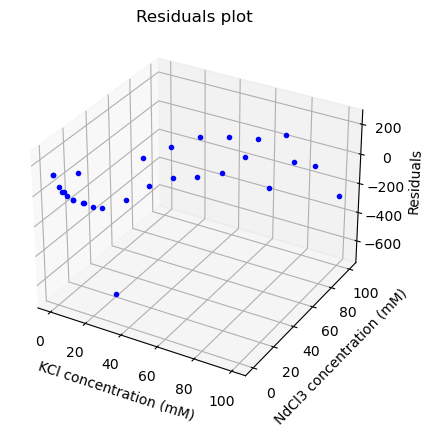

In [510]:
data = pd.read_csv("KCl&NdCl3_test.csv")
KCl_conc = data["KCl conc"]
NdCl3_conc = data["NdCl3 conc"]
cond = data["Bulk cond"]
ndata = len(cond)

KCl_conc_oh = [KCl_conc[i]**1.5 for i in range(ndata)]
NdCl3_conc_oh = [NdCl3_conc[i]**1.5 for i in range(ndata)]

KCl_conc_hf = [KCl_conc[i]**0.5 for i in range(ndata)]
NdCl3_conc_hf = [NdCl3_conc[i]**0.5 for i in range(ndata)]

KCl_conc_sq = [KCl_conc[i]**2 for i in range(ndata)]
NdCl3_conc_sq = [NdCl3_conc[i]**2 for i in range(ndata)]

sum_conc = KCl_conc + NdCl3_conc
sum_sq = [sum_conc[i]**2 for i in range(ndata)]

X = np.ones((ndata, 6))
X[:, 1] = KCl_conc
X[:, 2] = NdCl3_conc
X[:, 3] = KCl_conc_oh
X[:, 4] = NdCl3_conc_oh
X[:, 5] = sum_sq
# X[:, 1] = KCl_conc
# X[:, 2] = NdCl3_conc
# X[:, 3] = KCl_conc_hf
# X[:, 4] = NdCl3_conc_hf
# X[:, 5] = KCl_conc_oh
# X[:, 6] = NdCl3_conc_oh
# X[:, 7] = KCl_conc_sq
# X[:, 8] = NdCl3_conc_sq

cond_pred = np.matmul(beta_hat, np.transpose(X))

e = cond_pred - cond

fig = plt.figure()
 
# syntax for 3-D projection
ax = fig.add_subplot(projection ='3d')

# plotting
ax.plot3D(KCl_conc, NdCl3_conc, e, "b.")
ax.set_title("Residuals plot")
ax.set_zlabel("Residuals")
ax.set_xlabel("KCl concentration (mM)")
ax.set_ylabel("NdCl3 concentration (mM)")
plt.show()

In [512]:
# r squared evaluation
sse = sum(e[i]**2 for i in range(ndata))
cond_mean = np.mean(cond)
sd = [cond[i] - cond_mean for i in range(ndata)]
tss = sum(sd[i]**2 for i in range(ndata))

r_squared = 1 - (sse/tss)
print(f"r-squared value is: {r_squared}")

r-squared value is: 0.9996193625699837


In [ ]:
# All salts

In [541]:
data = pd.read_csv("All_salts.csv")
KCl_conc = data["KCl_conc"]
NdCl3_conc = data["NdCl3_conc"]
NaCl_conc = data["NaCl_conc"]
CaCl2_conc = data["CaCl2_conc"]
cond = data["Bulk_cond"]
ndata = len(cond)

conc = np.zeros((ndata, 4))
conc[:, 0] = KCl_conc
conc[:, 1] = NdCl3_conc
conc[:, 2] = NaCl_conc
conc[:, 3] = CaCl2_conc

conc_train, conc_test, cond_train, cond_test = train_test_split(conc, cond, test_size=0.15, random_state=0)

ndata_train = len(conc_train)
cond_train = list(cond_train)

KCl_conc_train = conc_train[:, 0]
NdCl3_conc_train = conc_train[:, 1]
NaCl_conc_train = conc_train[:, 2]
CaCl2_conc_train = conc_train[:, 3]

KCl_conc_hf = [KCl_conc_train[i]**0.5 for i in range(ndata_train)]
NdCl3_conc_hf = [NdCl3_conc_train[i]**0.5 for i in range(ndata_train)]
NaCl_conc_hf = [NaCl_conc_train[i]**0.5 for i in range(ndata_train)]
CaCl2_conc_hf = [CaCl2_conc_train[i]**0.5 for i in range(ndata_train)]

KCl_conc_oh = [KCl_conc_train[i]**1.5 for i in range(ndata_train)]
NdCl3_conc_oh = [NdCl3_conc_train[i]**1.5 for i in range(ndata_train)]
NaCl_conc_oh = [NaCl_conc_train[i]**1.5 for i in range(ndata_train)]
CaCl2_conc_oh = [CaCl2_conc_train[i]**1.5 for i in range(ndata_train)]

KCl_conc_sq = [KCl_conc_train[i]**2 for i in range(ndata_train)]
NdCl3_conc_sq = [NdCl3_conc_train[i]**2 for i in range(ndata_train)]
NaCl_conc_sq = [NaCl_conc_train[i]**2 for i in range(ndata_train)]
CaCl2_conc_sq = [CaCl2_conc_train[i]**2 for i in range(ndata_train)]

sum_conc = KCl_conc_train + NdCl3_conc_train + NaCl_conc_train + CaCl2_conc_train
sum_sq = [sum_conc[i]**2 for i in range(ndata_train)]

In [542]:
X = np.ones((ndata_train, 10))
# X[:, 1] = KCl_conc_train
# X[:, 2] = NdCl3_conc_train
# X[:, 3] = NaCl_conc_train
# X[:, 4] = CaCl2_conc_train
# X[:, 5] = KCl_conc_hf
# X[:, 6] = NdCl3_conc_hf
# X[:, 7] = NaCl_conc_hf
# X[:, 8] = CaCl2_conc_hf
# X[:, 9] = KCl_conc_oh
# X[:, 10] = NdCl3_conc_oh
# X[:, 11] = NaCl_conc_oh
# X[:, 12] = CaCl2_conc_oh
# X[:, 13] = KCl_conc_sq
# X[:, 14] = NdCl3_conc_sq
# X[:, 15] = NaCl_conc_sq
# X[:, 16] = CaCl2_conc_sq
X[:, 1] = KCl_conc_train
X[:, 2] = NdCl3_conc_train
X[:, 3] = NaCl_conc_train
X[:, 4] = CaCl2_conc_train
X[:, 5] = KCl_conc_oh
X[:, 6] = NdCl3_conc_oh
X[:, 7] = NaCl_conc_oh
X[:, 8] = CaCl2_conc_oh
X[:, 9] = sum_sq

A = np.matmul(np.transpose(X), X)
XXinv = np.linalg.inv(A)

B = np.matmul(np.transpose(X), cond_train)
beta_hat = np.matmul(XXinv, B)
print(f'Beta hat is:{beta_hat}')

Beta hat is:[ 8.97974420e+01  1.27915159e+02  2.86721755e+02  1.00286791e+02
  1.96258771e+02  1.28547105e-01 -3.70085894e+00  1.82679655e-02
 -2.61624072e+00 -1.03564263e-01]


In [318]:
# evaluating predictions
# KCl_conc_plot = np.linspace(0, 100, 100)
# NdCl3_conc_plot = np.linspace(0, 50, 100)
# NaCl_conc_plot = np.linspace(0, 50, 100)
# CaCl2_conc_plot = np.linspace(0, 50, 100)
# n = len(KCl_conc_plot)

# KCl_conc_plot_oh = [KCl_conc_plot[i]**1.5 for i in range(n)]
# NdCl3_conc_plot_oh = [NdCl3_conc_plot[i]**1.5 for i in range(n)]
# NaCl_conc_plot_oh = [NaCl_conc_plot[i]**1.5 for i in range(n)]
# CaCl2_conc_plot_oh = [CaCl2_conc_plot[i]**1.5 for i in range(n)]
# sum_plot = KCl_conc_plot + NdCl3_conc_plot + NaCl_conc_plot + CaCl2_conc_plot
# sum_plot_sq = [sum_plot[i]**2 for i in range(n)]

# X_plot = np.ones((len(KCl_conc_plot), 10))
# X_plot[:, 1] = KCl_conc_plot
# X_plot[:, 2] = NdCl3_conc_plot
# X_plot[:, 3] = NaCl_conc_plot
# X_plot[:, 4] = CaCl2_conc_plot
# X_plot[:, 5] = KCl_conc_plot_oh
# X_plot[:, 6] = NdCl3_conc_plot_oh
# X_plot[:, 7] = NaCl_conc_plot_oh
# X_plot[:, 8] = CaCl2_conc_plot_oh
# X_plot[:, 9] = sum_plot_sq

# cond_plot = np.matmul(beta_hat, np.transpose(X_plot))

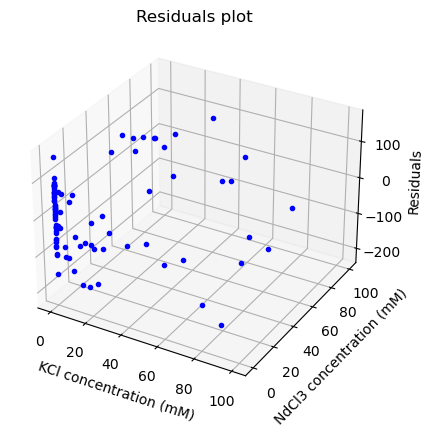

In [543]:
# calculating residuals
cond_train_pred = np.matmul(beta_hat, np.transpose(X))
e = cond_train_pred - cond_train

fig = plt.figure()
 
# syntax for 3-D projection
ax = fig.add_subplot(projection ='3d')

# plotting
ax.plot3D(KCl_conc_train, NdCl3_conc_train, e, "b.")
ax.set_title("Residuals plot")
ax.set_zlabel("Residuals")
ax.set_xlabel("KCl concentration (mM)")
ax.set_ylabel("NdCl3 concentration (mM)")
plt.show()

In [544]:
# variance of residuals
sse = sum(e[i]**2 for i in range(ndata_train))
se = sse/(ndata_train - 10)

# covariance matrix of fitted parameters
Sigma_beta = se*XXinv
print(Sigma_beta)

[[ 3.65101169e+02 -1.63045124e+01 -1.61399290e+01 -1.63103531e+01
  -1.72332859e+01  8.36123163e-01  8.18888675e-01  9.37816299e-01
   1.09340543e+00  4.92795749e-02]
 [-1.63045124e+01  5.34641562e+00 -3.79370553e-01  7.31377980e-01
   7.52737224e-01 -5.59786897e-01  3.80985646e-02 -5.39089934e-02
  -5.80359562e-02 -9.17767686e-04]
 [-1.61399290e+01 -3.79370553e-01  5.25140045e+00  7.23705453e-01
   7.46768113e-01  3.91331425e-02 -5.49039115e-01 -5.22023415e-02
  -5.65603031e-02 -1.03249136e-03]
 [-1.63103531e+01  7.31377980e-01  7.23705453e-01  1.01019804e+01
  -5.80472408e+00 -3.91917809e-02 -3.83802109e-02 -1.16851761e+00
   7.35799374e-01 -2.08721857e-03]
 [-1.72332859e+01  7.52737224e-01  7.46768113e-01 -5.80472408e+00
   1.31069873e+01 -2.91240298e-02 -2.85447114e-02  7.04579844e-01
  -1.61027672e+00 -2.96863775e-03]
 [ 8.36123163e-01 -5.59786897e-01  3.91331425e-02 -3.91917809e-02
  -2.91240298e-02  7.13326037e-02  6.60279490e-03  9.52674407e-03
   8.15231351e-03 -6.74181346e-04

In [545]:
var_list = [Sigma_beta[i, i] for i in range(len(Sigma_beta))]

sd_list = [np.sqrt(var_list[i]) for i in range(len(var_list))]
print(sd_list)

corr = np.zeros((len(var_list), len(var_list)))
for i in range(len(var_list)):
    for j in range(len(var_list)):
        corr[i, j] = Sigma_beta[i, j]/(sd_list[i]*sd_list[j])
print(corr)

[19.107620707941038, 2.3122317409506414, 2.29159343121339, 3.178361270568426, 3.620357339185728, 0.26708164242740084, 0.2647008835638085, 0.38196359218522713, 0.45915183647037366, 0.007453272490511966]
[[ 1.         -0.36903694 -0.36860179 -0.26856752 -0.24912083  0.16383987
   0.16190597  0.12849588  0.12462876  0.34602967]
 [-0.36903694  1.         -0.07159698  0.09951929  0.08992089 -0.90645726
   0.06224749 -0.06103907 -0.05466501 -0.05325427]
 [-0.36860179 -0.07159698  1.          0.09936216  0.09001124  0.0639386
  -0.90512868 -0.05963901 -0.05375487 -0.06045077]
 [-0.26856752  0.09951929  0.09936216  1.         -0.50446017 -0.04616871
  -0.04561931 -0.9625206   0.5041965  -0.08810847]
 [-0.24912083  0.08992089  0.09001124 -0.50446017  1.         -0.03012007
  -0.02978646  0.5095148  -0.96870769 -0.11001674]
 [ 0.16383987 -0.90645726  0.0639386  -0.04616871 -0.03012007  1.
   0.09339602  0.09338529  0.06647839 -0.33867699]
 [ 0.16190597  0.06224749 -0.90512868 -0.04561931 -0.0297

In [546]:
# r squared evaluation
cond_train_mean = np.mean(cond_train)
sd = [cond_train[i] - cond_train_mean for i in range(ndata_train)]
tss = sum(sd[i]**2 for i in range(ndata_train))

r_squared = 1 - (sse/tss)
print(f"r-squared value is: {r_squared}")

r-squared value is: 0.9998325170947958


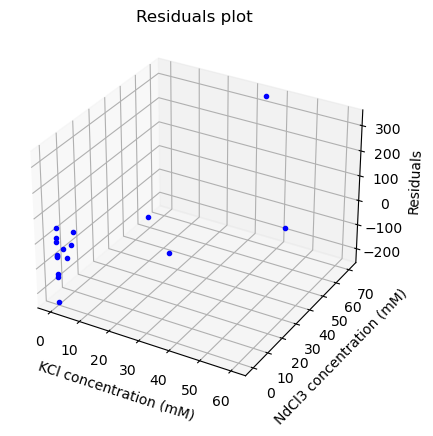

In [554]:
KCl_conc_test = conc_test[:, 0]
NdCl3_conc_test = conc_test[:, 1]
NaCl_conc_test = conc_test[:, 2]
CaCl2_conc_test = conc_test[:, 3]
ndata_test = len(KCl_conc_test)

KCl_conc_hf = [KCl_conc_test[i]**0.5 for i in range(ndata_test)]
NdCl3_conc_hf = [NdCl3_conc_test[i]**0.5 for i in range(ndata_test)]
NaCl_conc_hf = [NaCl_conc_test[i]**0.5 for i in range(ndata_test)]
CaCl2_conc_hf = [CaCl2_conc_test[i]**0.5 for i in range(ndata_test)]

KCl_conc_oh = [KCl_conc_test[i]**1.5 for i in range(ndata_test)]
NdCl3_conc_oh = [NdCl3_conc_test[i]**1.5 for i in range(ndata_test)]
NaCl_conc_oh = [NaCl_conc_test[i]**1.5 for i in range(ndata_test)]
CaCl2_conc_oh = [CaCl2_conc_test[i]**1.5 for i in range(ndata_test)]

KCl_conc_sq = [KCl_conc_test[i]**2 for i in range(ndata_test)]
NdCl3_conc_sq = [NdCl3_conc_test[i]**2 for i in range(ndata_test)]
NaCl_conc_sq = [NaCl_conc_test[i]**2 for i in range(ndata_test)]
CaCl2_conc_sq = [CaCl2_conc_test[i]**2 for i in range(ndata_test)]

sum_conc = KCl_conc_test + NdCl3_conc_test + NaCl_conc_test + CaCl2_conc_test
sum_sq = [sum_conc[i]**2 for i in range(ndata_test)]

X = np.ones((ndata_test, 10))
# X[:, 1] = KCl_conc_test
# X[:, 2] = NdCl3_conc_test
# X[:, 3] = NaCl_conc_test
# X[:, 4] = CaCl2_conc_test
# X[:, 5] = KCl_conc_hf
# X[:, 6] = NdCl3_conc_hf
# X[:, 7] = NaCl_conc_hf
# X[:, 8] = CaCl2_conc_hf
# X[:, 9] = KCl_conc_oh
# X[:, 10] = NdCl3_conc_oh
# X[:, 11] = NaCl_conc_oh
# X[:, 12] = CaCl2_conc_oh
# X[:, 13] = KCl_conc_sq
# X[:, 14] = NdCl3_conc_sq
# X[:, 15] = NaCl_conc_sq
# X[:, 16] = CaCl2_conc_sq
X[:, 1] = KCl_conc_test
X[:, 2] = NdCl3_conc_test
X[:, 3] = NaCl_conc_test
X[:, 4] = CaCl2_conc_test
X[:, 5] = KCl_conc_oh
X[:, 6] = NdCl3_conc_oh
X[:, 7] = NaCl_conc_oh
X[:, 8] = CaCl2_conc_oh
X[:, 9] = sum_sq

# evaluating model-predicted cond_test
cond_test_pred = np.matmul(beta_hat, np.transpose(X))
cond_test = list(cond_test)

e = cond_test_pred - cond_test

# plotting residuals
fig = plt.figure()
 
# syntax for 3-D projection
ax = fig.add_subplot(projection ='3d')

# plotting
ax.plot3D(KCl_conc_test, NdCl3_conc_test, e, "b.")
ax.set_title("Residuals plot")
ax.set_zlabel("Residuals")
ax.set_xlabel("KCl concentration (mM)")
ax.set_ylabel("NdCl3 concentration (mM)")
plt.show()

In [555]:
# r squared evaluation
sse = sum(e[i]**2 for i in range(ndata_test))
cond_test_mean = np.mean(cond_test)
sd = [cond_test[i] - cond_test_mean for i in range(ndata_test)]
tss = sum(sd[i]**2 for i in range(ndata_test))

r_squared = 1 - (sse/tss)
print(f"r-squared value is: {r_squared}")

r-squared value is: 0.9996300628448316


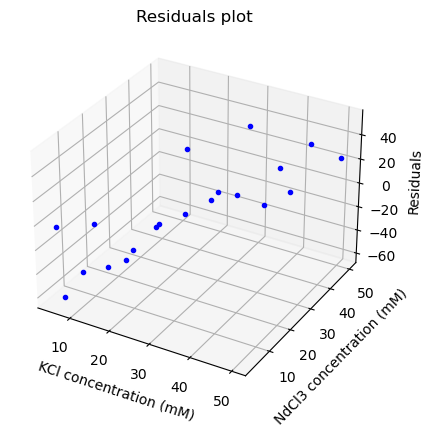

In [556]:
# model validation with new data
test_data = pd.read_csv("Test_data.csv")
NaCl_conc = test_data["NaCl_conc"]
CaCl2_conc = test_data["CaCl2_conc"]
KCl_conc = test_data["KCl_conc"]
NdCl3_conc = test_data["NdCl3_conc"]
test_cond = test_data["Cond"]

ndata = len(test_cond)
KCl_conc = np.zeros(ndata)
NdCl3_conc = np.zeros(ndata)

NaCl_conc_oh = [NaCl_conc[i]**1.5 for i in range(ndata)]
CaCl2_conc_oh = [CaCl2_conc[i]**1.5 for i in range(ndata)]
# KCl_conc_oh = [KCl_conc[i]**1.5 for i in range(ndata)]
# NdCl3_conc_oh = [NdCl3_conc[i]**1.5 for i in range(ndata)]

NaCl_conc_hf = [NaCl_conc[i]**0.5 for i in range(ndata)]
CaCl2_conc_hf = [CaCl2_conc[i]**0.5 for i in range(ndata)]
# KCl_conc_hf = [KCl_conc[i]**0.5 for i in range(ndata)]
# NdCl3_conc_hf = [NdCl3_conc[i]**0.5 for i in range(ndata)]

NaCl_conc_sq = [NaCl_conc[i]**2 for i in range(ndata)]
CaCl2_conc_sq = [CaCl2_conc[i]**2 for i in range(ndata)]
# KCl_conc_sq = [KCl_conc[i]**2 for i in range(ndata)]
# NdCl3_conc_sq = [NdCl3_conc[i]**2 for i in range(ndata)]

KCl_conc_oh = KCl_conc
NdCl3_conc_oh = NdCl3_conc

KCl_conc_hf = KCl_conc
NdCl3_conc_hf = NdCl3_conc

KCl_conc_sq = KCl_conc
NdCl3_conc_sq = NdCl3_conc

sum_conc = NaCl_conc + CaCl2_conc + KCl_conc + NdCl3_conc
sum_sq = [sum_conc[i]**2 for i in range(ndata)]

X = np.ones((ndata, 10))
# X[:, 1] = KCl_conc
# X[:, 2] = NdCl3_conc
# X[:, 3] = NaCl_conc
# X[:, 4] = CaCl2_conc
# X[:, 5] = KCl_conc_hf
# X[:, 6] = NdCl3_conc_hf
# X[:, 7] = NaCl_conc_hf
# X[:, 8] = CaCl2_conc_hf
# X[:, 9] = KCl_conc_oh
# X[:, 10] = NdCl3_conc_oh
# X[:, 11] = NaCl_conc_oh
# X[:, 12] = CaCl2_conc_oh
# X[:, 13] = KCl_conc_sq
# X[:, 14] = NdCl3_conc_sq
# X[:, 15] = NaCl_conc_sq
# X[:, 16] = CaCl2_conc_sq
X[:, 1] = KCl_conc
X[:, 2] = NdCl3_conc
X[:, 3] = NaCl_conc
X[:, 4] = CaCl2_conc
X[:, 5] = KCl_conc_oh
X[:, 6] = NdCl3_conc_oh
X[:, 7] = NaCl_conc_oh
X[:, 8] = CaCl2_conc_oh
X[:, 9] = sum_sq

cond_pred = np.matmul(beta_hat, np.transpose(X))
e = cond_pred - test_cond

# plotting residuals
fig = plt.figure()
 
# syntax for 3-D projection
ax = fig.add_subplot(projection ='3d')

# plotting
ax.plot3D(NaCl_conc, CaCl2_conc, e, "b.")
ax.set_title("Residuals plot")
ax.set_zlabel("Residuals")
ax.set_xlabel("KCl concentration (mM)")
ax.set_ylabel("NdCl3 concentration (mM)")
plt.show()

In [558]:
# r squared evaluation
sse = sum(e[i]**2 for i in range(ndata))
test_cond_mean = np.mean(test_cond)
sd = [test_cond[i] - test_cond_mean for i in range(ndata)]
tss = sum(sd[i]**2 for i in range(ndata))

r_squared = 1 - (sse/tss)
print(f"r-squared value is: {r_squared}")

r-squared value is: nan
